In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df_d = pd.read_excel(os.path.join('Dayton_All.xlsx'))
del df_d['Year']
del df_d['Month']
del df_d['Day']
del df_d['Day_of_Week']
del df_d['Weekend']
del df_d['Datetime']

df_d.head()

,MW,Utility,Temp(f)
0,1793,DAYTON,30.99
1,1788,DAYTON,33.80
2,1730,DAYTON,32.00
3,1701,DAYTON,30.20
4,1693,DAYTON,32.00


In [3]:
df_2016pos = df_d[df_d['Temp(f)'] >= 60].copy()
df_2016neg = df_d[df_d['Temp(f)'] < 60].copy()

In [4]:
droplist = df_2016pos[(df_2016pos['Temp(f)'] < 79) & (df_2016pos['Temp(f)'] > 76) & (df_2016pos.MW > 3000)].index
df_2016pos.drop(droplist,inplace = True)

In [5]:
X = df_2016pos["Temp(f)"].values.reshape(-1, 1)
y = df_2016pos["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (11024, 1) (11024, 1)


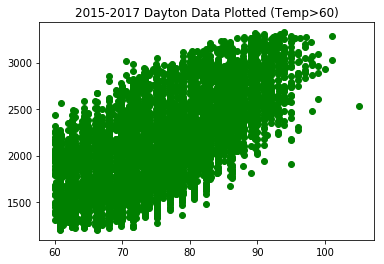

In [6]:
plt.scatter(X, y,color='g')
plt.title("2015-2017 Dayton Data Plotted (Temp>60)")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [8]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.42688360453325924
Testing Score: 0.43360565983764154


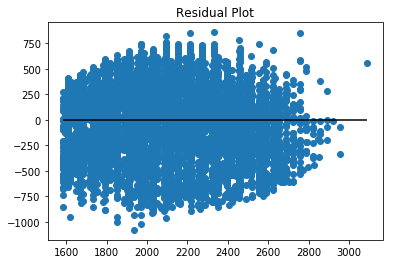

In [9]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

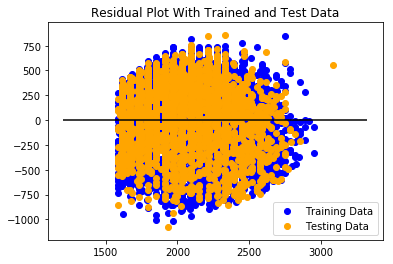

In [10]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [11]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
# POWER = -425.90358286 + (33.4839025 * TEMP)

Weight coefficients:  [[33.4839025]]
y-axis intercept:  [-425.90358286]


In [12]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  -410.87605475+ 33.24873408 * x_min
y_max = -410.87605475+ 33.24873408 * x_max

Actual Min Value: 1199
Predicted Min Value: [[1583.46540606]]
Actual Max Value: 3327
Predicted Max Value: [[3090.24101847]]


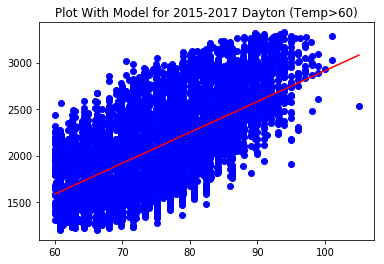

In [13]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2015-2017 Dayton (Temp>60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [14]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [1433]
Predicted output: [1730.45973802]
Prediction Error: [297.45973802]


In [15]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [16]:
for x in range(len(df_2016pos)):
   modeldf.loc[modeldf.Actual == df_2016pos.iloc[x].MW,'Temp'] =df_2016pos.iloc[x]['Temp(f)']

In [17]:
modeldf

,Actual,Error,Predicted,Temp
0,1433.0,297.459738,1730.459738,68.00
1,1398.0,272.188714,1670.188714,69.80
2,1671.0,-61.082311,1609.917689,68.00
3,1646.0,-36.082311,1609.917689,75.99
4,1630.0,40.188714,1670.188714,69.80
5,1655.0,75.459738,1730.459738,71.60
6,1769.0,142.272812,1911.272812,64.99
7,1792.0,119.272812,1911.272812,80.60
8,1766.0,145.272812,1911.272812,77.00
9,1728.0,243.543836,1971.543836,73.40


In [18]:
X = df_2016neg["Temp(f)"].values.reshape(-1, 1)
y = df_2016neg["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (9179, 1) (9179, 1)


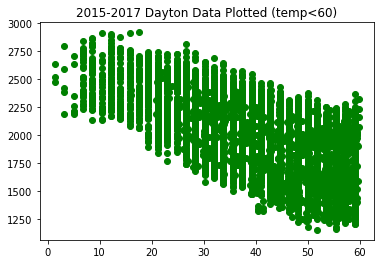

In [19]:
plt.scatter(X, y,color='g')
plt.title("2015-2017 Dayton Data Plotted (temp<60)")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

In [21]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3629764817256157
Testing Score: 0.3997555210376223


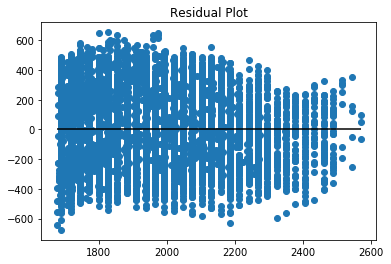

In [22]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

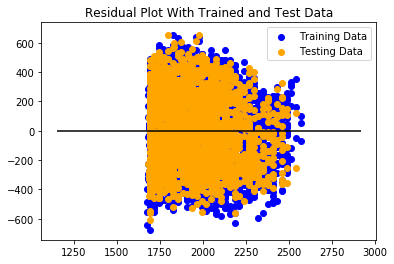

In [23]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [24]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
# POWER = 2591.3279557 * (-15.26891783 * TEMP)

Weight coefficients:  [[-15.26891783]]
y-axis intercept:  [2591.3279557]


In [25]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  2591.3279557+ (-15.26891783 * x_min)
y_max = 2591.3279557+ (-15.26891783 * x_max)

Actual Min Value: 1151
Predicted Min Value: [[2569.95147073]]
Actual Max Value: 2919
Predicted Max Value: [[1677.02515582]]


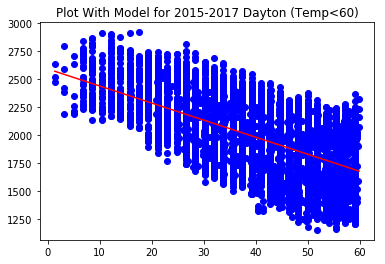

In [26]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2015-2017 Dayton (Temp<60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [27]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [1793]
Predicted output: [2118.14419204]
Prediction Error: [325.14419204]


In [28]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [29]:
for x in range(len(df_2016neg)):
   modeldf.loc[modeldf.Actual == df_2016neg.iloc[x].MW,'Temp'] =df_2016neg.iloc[x]['Temp(f)']

In [30]:
modeldf

,Actual,Error,Predicted,Temp
0,1793.0,325.144192,2118.144192,34.00
1,1788.0,287.238533,2075.238533,46.40
2,1730.0,372.722585,2102.722585,50.00
3,1701.0,429.206637,2130.206637,42.80
4,1693.0,409.722585,2102.722585,30.20
5,1708.0,367.238533,2075.238533,41.84
6,1732.0,343.238533,2075.238533,59.00
7,1778.0,297.238533,2075.238533,41.00
8,1849.0,226.238533,2075.238533,41.00
9,1877.0,170.754481,2047.754481,33.80
